# Сравнение Mergesort и Hybridsort

In [ ]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 11
plt.style.use('seaborn-v0_8-darkgrid')

compile_cmd = "g++ -std=c++11 -O2 -o a2i_experiment a2i_experiment.cpp"
result = subprocess.run(compile_cmd, shell=True, capture_output=True, text=True, cwd="set3/a2")


N_VALUES = list(range(100, 50001, 500))
THRESHOLDS = [5, 10, 20, 30, 50]
NUM_RUNS = 5


In [ ]:
def run(n, thr, num_runs=1):
    cmd = f"./a2i_experiment {n} {thr}"
    
    merge = {'random': [], 'reversed': [], 'near_sorted': []}
    hybrid = {'random': [], 'reversed': [], 'near_sorted': []}
    
    for i in range(num_runs):
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True, cwd="set3/a2")
        lines = result.stdout.strip().split('\n')
        for line in lines:
            data_type = line.split()[0]
            merge[data_type].append(int(line.split()[1]) / 1000.0)
            hybrid[data_type].append(int(line.split()[2]) / 1000.0)
    
    res = {}
    for label in ['random', 'reversed', 'near_sorted']:
        res[data_type] = {
            'merge_mean': np.mean(merge[label]),
            'hybrid_mean': np.mean(hybrid[label])
        }
    return res


## Merge Sort


In [52]:
merge_sort_results = {
    'random': {'n': [], 'time_mean': []},
    'reversed': {'n': [], 'time_mean': []},
    'near_sorted': {'n': [], 'time_mean': []}
}

for n in tqdm(N_VALUES):
    results = run(n, 0, NUM_RUNS)
    
    for label in ['random', 'reversed', 'near_sorted']:
        merge_sort_results[label]['n'].append(n)
        merge_sort_results[label]['time_mean'].append(results[label]['merge_mean'])

  0%|          | 0/100 [00:00<?, ?it/s]

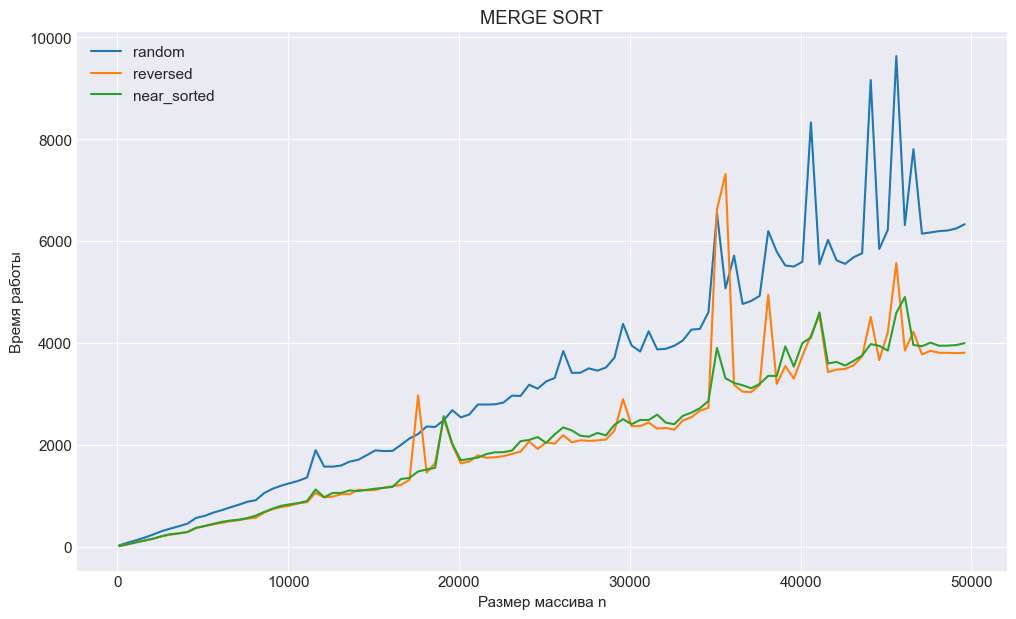

In [68]:
plt.figure(figsize=(12, 7))

for label in ['random', 'reversed', 'near_sorted']:
    n_vals = merge_sort_results[label]['n']
    time_mean = merge_sort_results[label]['time_mean']
    plt.plot(n_vals, time_mean, label=label)

plt.xlabel('Размер массива n')
plt.ylabel('Время работы')
plt.title('MERGE SORT',)
plt.legend()



На графике видно, что рост времени действительно происходит согласно асимптотике O(n*log(n)). <br/><br/> Также интересный момент заключается в следующем: сортировка случайного массива происходит в среднем медленнее
чем сортировка почти упорядоченного и даже обратно отсортированного массива. <br/><br/> Скорее всего, суть тут заключается в следующем: при сортировке почти упорядоченного или обратно сортированного массива операция 
слияния двух частей массива происходит с небольшим числом переключений между областями памяти, сравнительно со случайным массивом.

## MERGE+INSERTION SORT
На всех трех графиках ниже мы видим, что оптимальной границей перехода на insert sort является наибольшее значение - 50. <br/> <br/> При этом по мере увеличения этого порога видно, что скорость улучшения результатов между разными границами становится все меньше и меньше. Возможно дальнейшее увеличение уже привело бы нас к ухудшению результата.

In [55]:
hybrid_res = { threshold: {'random': {'n': [], 'time_mean': []}, 'reversed': {'n': [], 'time_mean': []}, 'near_sorted': {'n': [], 'time_mean': []}} for threshold in THRESHOLDS }

for thr in THRESHOLDS:
    for n in tqdm(N_VALUES, desc=f"Threshold {thr}"):
        results = run(n, thr, NUM_RUNS)
        for label in ['random', 'reversed', 'near_sorted']:
            hybrid_res[thr][label]['n'].append(n)
            hybrid_res[thr][label]['time_mean'].append(results[label]['hybrid_mean'])


Threshold 5:   0%|          | 0/100 [00:00<?, ?it/s]

Threshold 10:   0%|          | 0/100 [00:00<?, ?it/s]

Threshold 20:   0%|          | 0/100 [00:00<?, ?it/s]

Threshold 30:   0%|          | 0/100 [00:00<?, ?it/s]

Threshold 50:   0%|          | 0/100 [00:00<?, ?it/s]

### Random arr


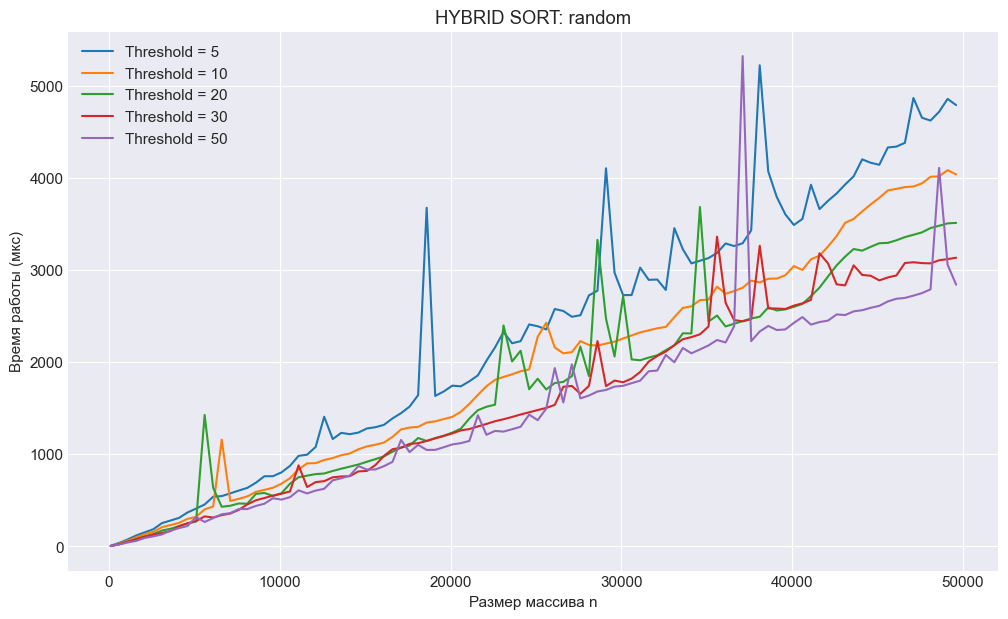

In [59]:
for threshold in THRESHOLDS:
    n_vals = hybrid_res[threshold]['random']['n']
    time_mean = hybrid_res[threshold]['random']['time_mean']
    plt.plot(n_vals, time_mean, label=f'Threshold = {threshold}')

plt.xlabel('Размер массива n')
plt.ylabel('Время работы (мкс)')
plt.title('HYBRID SORT: random',)
plt.legend()


### Reversed arr


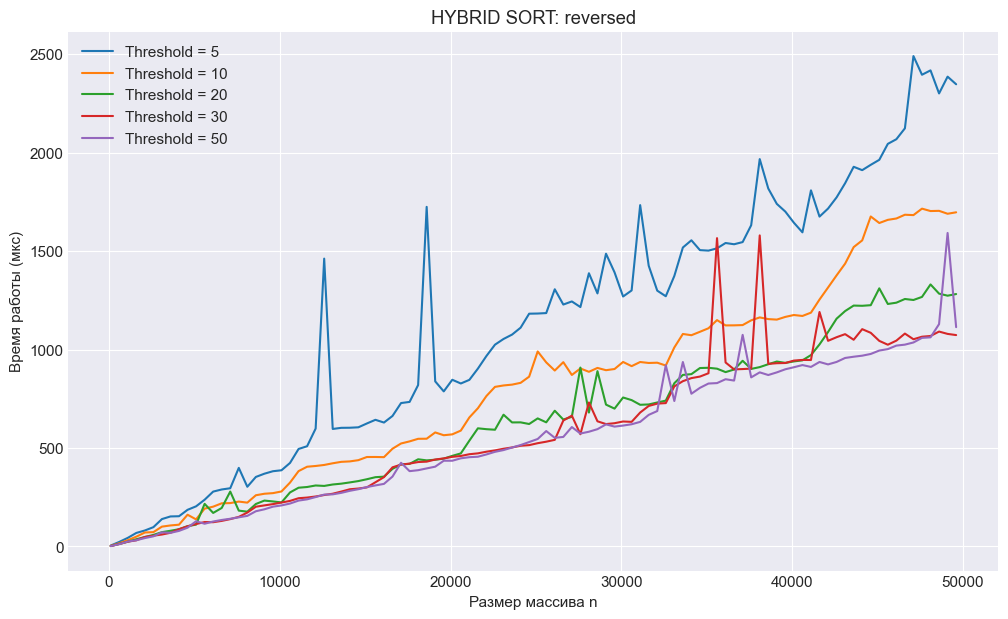

In [58]:
for threshold in THRESHOLDS:
    n_vals = hybrid_res[threshold]['reversed']['n']
    time_mean = hybrid_res[threshold]['reversed']['time_mean']
    plt.plot(n_vals, time_mean, label=f'Threshold = {threshold}')

plt.xlabel('Размер массива n')
plt.ylabel('Время работы (мкс)')
plt.title('HYBRID SORT: reversed',)
plt.legend()

### Near sorted arr


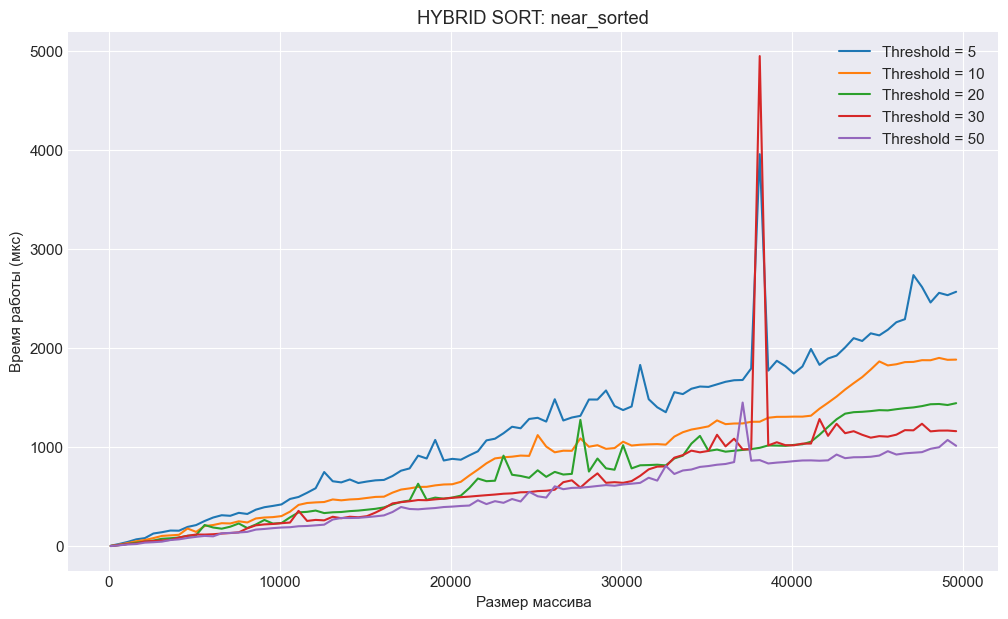

In [60]:
for threshold in THRESHOLDS:
    n_vals = hybrid_res[threshold]['near_sorted']['n']
    time_mean = hybrid_res[threshold]['near_sorted']['time_mean']
    plt.plot(n_vals, time_mean, label=f'Threshold = {threshold}')

plt.xlabel('Размер массива')
plt.ylabel('Время работы (мкс)')
plt.title('HYBRID SORT: near_sorted',)
plt.legend()

## Сравнение MERGE SORT и HYBRID SORT с threshold = 50


Text(0.5, 0.98, 'MERGE SORT и HYBRID SORT(threshold 50)')

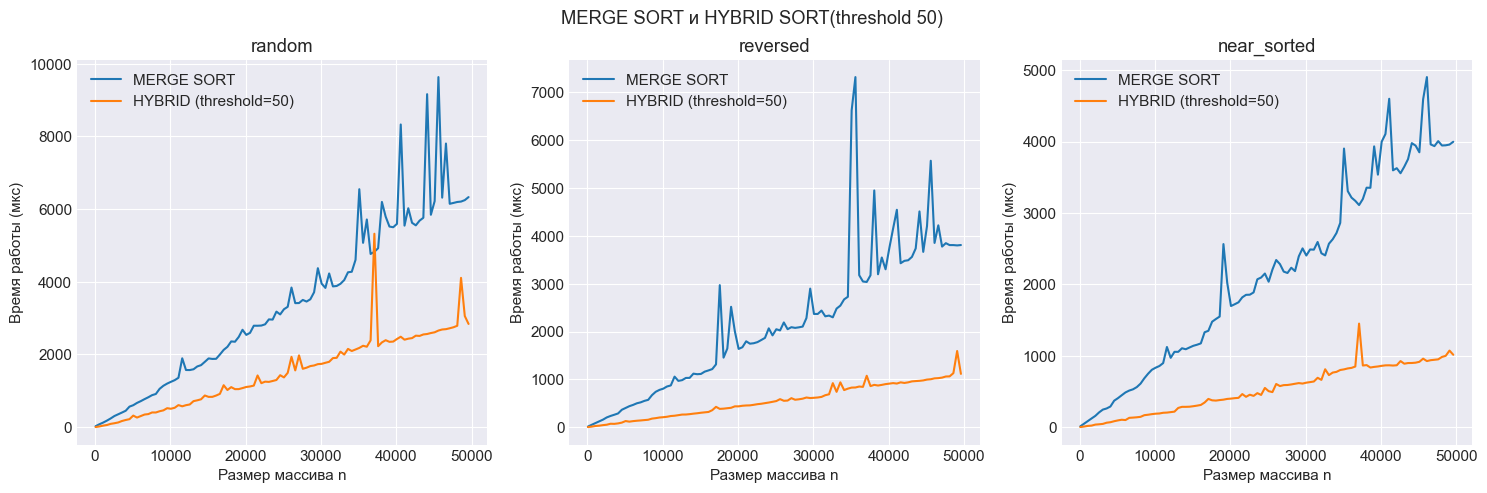

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

labels = ['random', 'reversed', 'near_sorted']

for idx, label in enumerate(labels):
    n_merge = merge_sort_results[label]['n']
    time_merge = merge_sort_results[label]['time_mean']
    axes[idx].plot(n_merge, time_merge,  label='MERGE SORT')
    
    n_hybrid = hybrid_res[50][label]['n']
    time_hybrid = hybrid_res[50][label]['time_mean']
    axes[idx].plot(n_hybrid, time_hybrid, label=f'HYBRID (threshold=50)')
    axes[idx].set_xlabel('Размер массива n')
    axes[idx].set_ylabel('Время работы (мкс)')
    axes[idx].set_title(f'{label}')
    axes[idx].legend()
    

plt.suptitle(f'MERGE SORT и HYBRID SORT(threshold 50)')


Сравнивая классическую реализацию mergesort и наилучший гибридный вариант мы четко можем увидеть различия: гибрид работает сильно лучше. При этом на больших значениях числа элементов гибридный вариант ведет себя еще и стабильнее.